
Zadanie

    Napisać program w języku C używającego interfejsu GSL do BLAS: funkcji gsl_blas_ddot (mnożenie dwóch wektorów) i gsl_blas_dgemv (mnożenie macierzy przez wektor).
    Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.
    Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
    Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.
    Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy w tabalke za pomoca opcji layout
    Należy zadbać o staranne podpisanie osi i wykresów.



In [ ]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>
#include <unistd.h>
#include <sys/times.h>
#include <limits.h>
#include <stdlib.h>
#include <sys/time.h>

#define LEV1OFF 10000000
#define LEV2OFF 1000


double lev1Multi(double *vec1, double *vec2, int length);
double lev2Multi(double *mat, int lin, int col, double *vec, int length);
void memFault(void);

int main(void){

	srand(time(NULL));
	
	FILE *fp;
	fp = fopen("blasTimesTest.csv", "w");
	if(fp == NULL){
		fprintf(stderr, "Unable to open file\n");
		exit(EXIT_FAILURE);
	}
	fprintf(fp, "\"level\";\"test_number\";\"vector_size\";\"time\"\n");
	

	for(unsigned long i = LEV1OFF; i <= LEV1OFF * 10; i += LEV1OFF / 2){

		double *a = calloc(i, sizeof(double));
                if(a == NULL) memFault();

                double *b = calloc(i, sizeof(double));
                if(b == NULL) memFault();

		for(unsigned long j = 0; j < i; j++){
			a[j] = (double) (rand() % 1000);
			b[j] = (double) (rand() % 1000);
		}
		for(int j = 1; j <= 10; j++){
			fprintf(fp, "1;%d;%lu;%.6lf\n", j, i, lev1Multi(a, b, i));
		}

		free(a);
		free(b);
	}

	printf("First level done.\n");

	
	for(unsigned long i = LEV2OFF; i <= LEV2OFF * 10; i += LEV2OFF / 2){

        	double *a = calloc(i * i, sizeof(double));
                if(a == NULL) memFault();

                double *b = calloc(i, sizeof(double));
                if(b == NULL) memFault();

        for(int j = 0; j < i*i; j++) a[j] = (double) (rand() % 1000);
        for(int j = 0; j < i; j++) b[j] = (double) (rand() % 1000);

        for(int j = 1; j <= 10; j++){
            fprintf(fp, "2;%d;%lu;%.6lf\n", j, i, lev2Multi(a, i, i, b, i));
        }

                free(a);
                free(b);
        }

	printf("Second level done.\n");

	
	fclose(fp);

	return 0;
}


double lev1Multi(double *vec1, double *vec2, int length){
	struct timeval start, end;

	double res;
	gsl_vector_view A = gsl_vector_view_array(vec1, length);
	gsl_vector_view B = gsl_vector_view_array(vec1, length);

	gettimeofday(&start, NULL); 
	gsl_blas_ddot(&A.vector, &B.vector, &res);
	gettimeofday(&end, NULL);
	double time_taken; 
  
    	time_taken = (end.tv_sec - start.tv_sec) * 1e6; 
    	time_taken = (time_taken + (end.tv_usec - start.tv_usec)) * 1e-6; 
	
	return time_taken;
}

double lev2Multi(double *mat, int row, int col, double *vec, int length){
	struct timeval start, end;

        double res[row];
	for(int i = 0; i < row; i++){
		res[i] = 0;
	}

        gsl_matrix_view M = gsl_matrix_view_array(mat, row, col);
        gsl_vector_view V = gsl_vector_view_array(vec, length);
        gsl_vector_view C = gsl_vector_view_array(res, row);

	gettimeofday(&start, NULL);
	gsl_blas_dgemv(CblasNoTrans, 1.0, &M.matrix, &V.vector, 0.0, &C.vector);
	gettimeofday(&end, NULL);

	double time_taken; 
  
    	time_taken = (end.tv_sec - start.tv_sec) * 1e6; 
    	time_taken = (time_taken + (end.tv_usec - start.tv_usec)) * 1e-6; 
	
	return time_taken;
}


void memFault(void){
	fprintf(stderr, "Memory allocation fault\n");
	exit(EXIT_FAILURE);
}

In [8]:
using CSV
input="blasTimesTest.csv"
df=CSV.read(input, delim=";")

,level,test_number,vector_size,time
,Int64⍰,Int64⍰,Int64⍰,Float64⍰
1,1,1,10000000,0.013408
2,1,2,10000000,0.013427
3,1,3,10000000,0.013559
4,1,4,10000000,0.013417
5,1,5,10000000,0.013628
6,1,6,10000000,0.013387
7,1,7,10000000,0.013537
8,1,8,10000000,0.01343
9,1,9,10000000,0.01342


In [9]:
using DataFrames, CSV, Statistics
df1=by(df, [:level, :vector_size], :time => mean, :time => std)

,level,vector_size,time_mean,time_std
,Int64⍰,Int64⍰,Float64,Float64
1,1,10000000,0.0134545,9.03736e-5
2,1,15000000,0.0200839,0.000226286
3,1,20000000,0.0267851,0.000223099
4,1,25000000,0.0334992,0.000250055
5,1,30000000,0.040102,0.000211103
6,1,35000000,0.0466913,9.73973e-5
7,1,40000000,0.0533514,9.93123e-5
8,1,45000000,0.060056,0.000139382
9,1,50000000,0.0669438,0.00057183


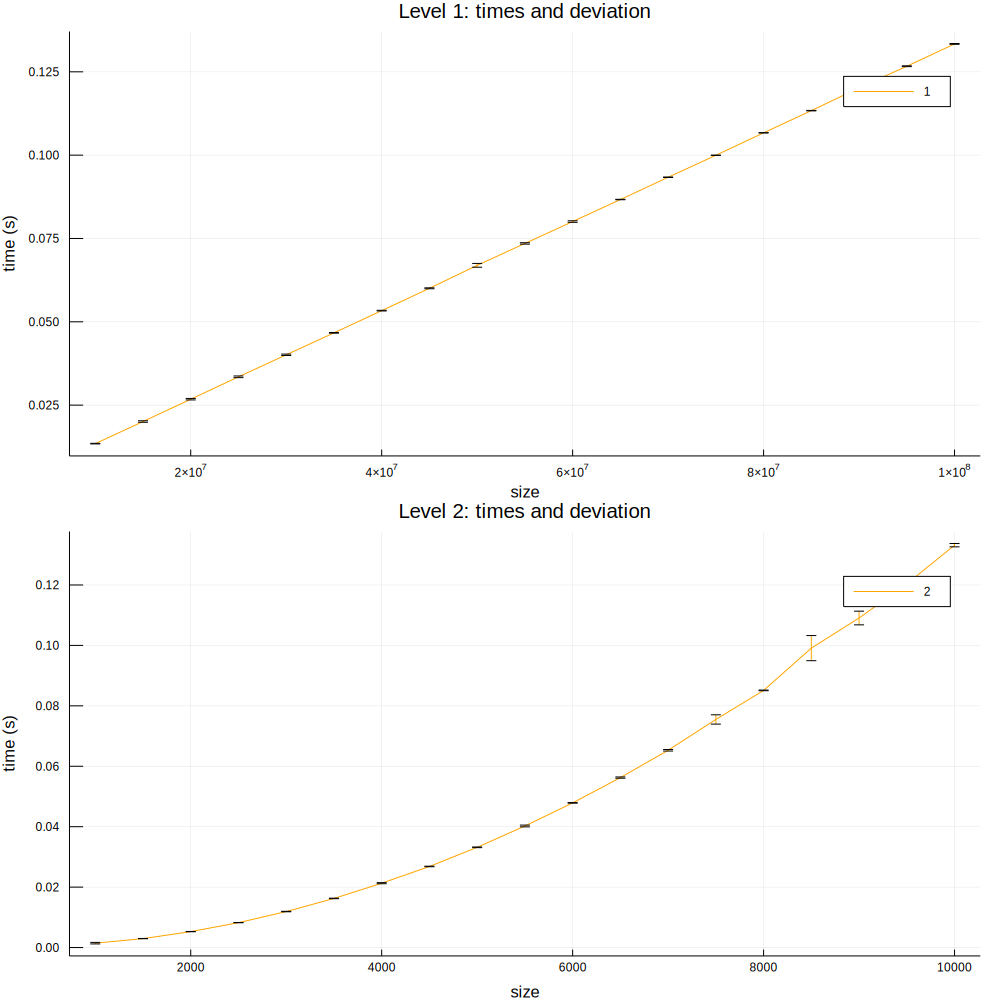

In [10]:
using Plots
plot(df1[:vector_size], df1[:time_mean], yerr=df1[:time_std], group=df1[:level], colour=[:orange], xlabel="size", ylabel="time (s)", layout=(2,1), size=(1000, 1000), title=["Level $i: times and deviation" for j=1:1, i=1:2])